In [2]:
import numpy as np
def f(x):
#     return x**3 - x**2 -15*x +1
#     return x**2 - x - 1
#     return x**3 - 7*x**2 + 8*x - 3
    return x*np.cos(x)
#     return np.cos(x) - x
def df(x):
#     return 3*x**2 - 2*x - 15
#     return 2*x - 1
#     return 3*x*2 - 14*x + 8
    return np.cos(x) - x*np.sin(x)
#     return -np.sin(x) - 1
def newtonSolver(x0 = 1 , err = 0.000001):
    fx0 = 1000
    dfx0 = 1000
    step = 1000
    #(dfx0 > err or dfx0 < err ) and (fx0 < err or fx0 > err)
    while (step > err or step < -1*err) and (dfx0 < err or dfx0 > err) :
        fx0 = f(x0)
        dfx0 = df(x0)
        step = fx0/dfx0
        print('x0 = '+ str(x0)+'\tf(x) = '+str(fx0) + '\tf\'(x) = '+str(dfx0) + '\t step (f(x)/f\'(x)) = '+ str(step) )
        x0 -= step
newtonSolver(x0 = 1)

    

x0 = 1	f(x) = 0.5403023058681398	f'(x) = -0.30116867893975674	 step (f(x)/f'(x)) = -1.7940189124919503
x0 = 2.7940189124919503	f(x) = -2.6269419068482125	f'(x) = -1.8918940312984511	 step (f(x)/f'(x)) = 1.3885248662924745
x0 = 1.4054940461994758	f(x) = 0.23127474609490328	f'(x) = -1.2217847803619049	 step (f(x)/f'(x)) = -0.18929254138064922
x0 = 1.594786587580125	f(x) = -0.03825567632153244	f'(x) = -1.618315643399873	 step (f(x)/f'(x)) = 0.023639193304195085
x0 = 1.57114739427593	f(x) = -0.0005515787467103753	f'(x) = -1.5714983649290701	 step (f(x)/f'(x)) = 0.0003509890681529732
x0 = 1.570796405207777	f(x) = -1.2317067057539309e-07	f'(x) = -1.5707964836206525	 step (f(x)/f'(x)) = 7.841287643545477e-08


In [3]:
x = np.array([1,2,3,4,5,6])
x =np.c_[np.ones(x.shape[0]), x] 
x

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.]])

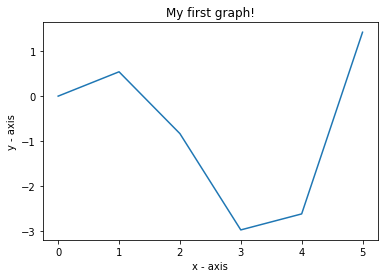

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# x axis values
x = np.arange(0,6,1)
# print(x)
# corresponding y axis values
y = []
for i in x:
    y.append(f(i))
# # plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title('My first graph!')
  
# function to show the plot
plt.show()

In [9]:

def cost(y,x,w1,w2,p):#takes real values y , inputs x , weights w1,w2, power p
    err = 0.0
    for i in range(len(y)):
        err += (abs(y[i]-(w1+x[i]*w2)))**p
    return (err)/len(y)
# print(cost(x_points,y_points))
def lr(x,y,th0=0.0,itr = 1000,th1=0.0,learningRate = 0.1,minErr = 0.1,patchsize = len(x)):
    err = 1
    for i in range(itr):
        temp = cost(y,x,th0,th1,2)
#         for i in x:
#             temp.append(th0+th1*x[i])
        err = cost(y,x,th0,th1,1)
        print(err)
        th0 -= learningRate*err
        th1 -= learningRate*err*th1
#     print(th0,'\t',th1)

return th0,th1
th0 , th1 = lr(x_points,y_points)


5.583333333333333
6.141666666666668
6.755833333333334
7.431416666666668
8.174558333333335
8.992014166666669
9.891215583333336
10.880337141666667
11.968370855833333
13.16520794141667
14.481728735558335
15.92990160911417
17.52289177002559
19.27518094702815
21.20269904173096
23.322968945904062
25.655265840494465
28.220792424543916
31.042871666998305
34.14715883369814
37.56187471706796
41.31806218877474
45.44986840765222
49.99485524841743
54.99434077325918
60.49377485058512
66.54315233564361
73.19746756920797
80.51721432612878
88.56893575874163
97.42582933461581
107.16841226807742
117.88525349488515
129.67377884437366
142.64115672881104
156.9052724016921
172.5957996418613
189.85537960604745
208.84091756665228
229.7250093233174
252.69751025564918
277.96726128121406
305.76398740933547
336.3403861502691
369.9744247652959
406.9718672418255
447.669053966008
492.4359593626089
541.6795552988699
595.8475108287569
655.4322619116323
720.9754881027958
793.0730369130753
872.3803406043829
959.618374664

Thetas: 0.12, 0.92


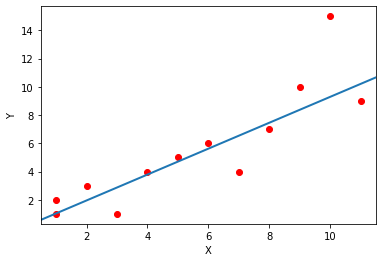

In [22]:
import numpy as np
x_points = np.array([1,1,2,3,4,5,6,7,8,9,10,11])
x_points = np.c_[np.ones(x_points.shape[0]), x_points] 
y_points = np.array([1,2,3,1,4,5,6,4,7,10,15,9],)

def gradient_descent(x, y, theta= np.random.rand(2), alpha =0.001 ,patch_size= 0):
    if patch_size ==0:
        patch_size = len(x)
    elif patch_size > len(x):
        patch_size = len(x)
    for p in range(int(len(x)/patch_size)):
        for i in range(patch_size):
            prediction = np.dot(x, theta)
            error = prediction - y
            cost = 1/(2*patch_size) * np.dot(error.T, error)#cost = 1/2m (sum(prediction-real)^2)
            theta -= (alpha * (1/patch_size) * np.dot(x.T, error)) 
            #update thetas in each iteration by formula theta = theta - (alpha*1/m*x.T*error)
        return theta

theta = gradient_descent(x_points, y_points,patch_size=16)

print("Thetas: {:.2f}, {:.2f}".format(theta[0], theta[1]))

import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x_points[:,1], y_points, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
x = np.linspace(-5, 20, 1000)
y = theta[1]*x + theta[0]
line.set_data(x, y)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

#create basic scatterplot
plt.plot(x_points, y_points, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x_points, y_points, 1)

#add linear regression line to scatterplot 
plt.plot(x_points, th1*x_points+th0)